# CSC4008 Assignment 3
### Jiang Jingxin 117020119
## Decision Tree (Weka)

In [1]:
import numpy as np
import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/Jingxin/.pyenv/versions/3.6.10/envs/virtual/lib/python3.6/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/Jingxin/.pyenv/versions/3.6.10/envs/virtual/lib/python3.6/site-packages/javabridge/jars/runnablequeue.jar', '/Users/Jingxin/.pyenv/versions/3.6.10/envs/virtual/lib/python3.6/site-packages/javabridge/jars/cpython.jar', '/Users/Jingxin/.pyenv/versions/3.6.10/envs/virtual/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/Jingxin/.pyenv/versions/3.6.10/envs/virtual/lib/python3.6/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


## \#Problem 1 `weather.nomial.arff`

In [2]:
from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file("weather.nominal.arff")
data.class_is_last()

### 1.1) \#Instances &  \#Attributes

In [3]:
data.num_instances

14

In [4]:
data.num_attributes

5

**Answer**: There are 14 instances and 5 attributes in this dataset

### 1.2) \#Distinct `temperature` Label

In [5]:
data.attribute(1)

@attribute temperature {hot,mild,cool}

In [6]:
data.attribute_stats(1)

Type  Nom  Int Real     Missing      Unique  Dist  C[0] C[1] C[2]
 Nom 100%   0%   0%     0 /  0%     0 /  0%     3     4    6    4

**Answer**: There are 3 distinct labels for the `temperature` attribute: hot, mild and cool

### 1.3) RemoveWithValues Filter

In [7]:
from weka.filters import Filter
remove = Filter(classname="weka.filters.unsupervised.instance.RemoveWithValues", 
                 options=["-S", "0.0", "-C", "3", "-L", "1"])
remove.inputformat(data) 
filtered = remove.filter(data)
filtered

@relation weather.symbolic-weka.filters.unsupervised.instance.RemoveWithValues-S0.0-C3-L1

@attribute outlook {sunny,overcast,rainy}
@attribute temperature {hot,mild,cool}
@attribute humidity {high,normal}
@attribute windy {TRUE,FALSE}
@attribute play {yes,no}

@data
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,cool,normal,FALSE,yes
rainy,mild,normal,FALSE,yes
sunny,mild,normal,TRUE,yes
overcast,hot,normal,FALSE,yes

### 1.4) J48 Decision Tree

In [8]:
from weka.classifiers import Classifier, Evaluation
cls = Classifier(classname="weka.classifiers.trees.J48", 
                 options=["-C", "0.3"])
cls.build_classifier(data)

In [9]:
 for index, inst in enumerate(data):
    pred = cls.classify_instance(inst)
    dist = cls.distribution_for_instance(inst)
    print(str(index+1) + ":\tlabel index = " + str(pred) + ",\tdata = "+str(inst))

1:	label index = 1.0,	data = sunny,hot,high,FALSE,no
2:	label index = 1.0,	data = sunny,hot,high,TRUE,no
3:	label index = 0.0,	data = overcast,hot,high,FALSE,yes
4:	label index = 0.0,	data = rainy,mild,high,FALSE,yes
5:	label index = 0.0,	data = rainy,cool,normal,FALSE,yes
6:	label index = 1.0,	data = rainy,cool,normal,TRUE,no
7:	label index = 0.0,	data = overcast,cool,normal,TRUE,yes
8:	label index = 1.0,	data = sunny,mild,high,FALSE,no
9:	label index = 0.0,	data = sunny,cool,normal,FALSE,yes
10:	label index = 0.0,	data = rainy,mild,normal,FALSE,yes
11:	label index = 0.0,	data = sunny,mild,normal,TRUE,yes
12:	label index = 0.0,	data = overcast,mild,high,TRUE,yes
13:	label index = 0.0,	data = overcast,hot,normal,FALSE,yes
14:	label index = 1.0,	data = rainy,mild,high,TRUE,no


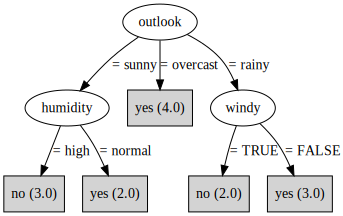

In [10]:
import graphviz
graph = graphviz.Source(cls.graph)
graph

### 1.5) Performance Analysis

In [11]:
evaluation = Evaluation(data)
evl = evaluation.test_model(cls, data)
print(evaluation.summary())
print(evaluation.class_details())
print(evaluation.matrix())


Correctly Classified Instances          14              100      %
Incorrectly Classified Instances         0                0      %
Kappa statistic                          1     
Mean absolute error                      0     
Root mean squared error                  0     
Relative absolute error                  0      %
Root relative squared error              0      %
Total Number of Instances               14     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1.000    0.000    1.000      1.000    1.000      1.000    1.000     1.000     yes
                 1.000    0.000    1.000      1.000    1.000      1.000    1.000     1.000     no
Weighted Avg.    1.000    0.000    1.000      1.000    1.000      1.000    1.000     1.000     

=== Confusion Matrix ===

 a b   <-- classified as
 9 0 | a = yes
 0 5 | b = no



## \#Problem 2 `HR-Employee-Attrition.csv`

In [12]:
from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.CSVLoader")
data = loader.load_file("HR-Employee-Attrition.csv")
data.class_index =1

### 2.1) Attribute Selection

In [13]:
from weka.filters import Filter
from weka.attribute_selection import ASSearch, ASEvaluation

flter = Filter(classname="weka.filters.supervised.attribute.AttributeSelection")
aseval = ASEvaluation(classname="weka.attributeSelection.CfsSubsetEval", 
                      options=["-P", "1", "-E", "1"])
assearch = ASSearch(classname="weka.attributeSelection.BestFirst", 
                    options=["-D", "1", "-N", "5"])
flter.set_property("evaluator", aseval.jobject)
flter.set_property("search", assearch.jobject)
flter.inputformat(data)
filtered = flter.filter(data)
print(filtered.summary(filtered))

Relation Name:  HR-Employee-Attrition-weka.filters.supervised.attribute.AttributeSelection-Eweka.attributeSelection.CfsSubsetEval -P 1 -E 1-Sweka.attributeSelection.BestFirst -D 1 -N 5
Num Instances:  1470
Num Attributes: 13

     Name                      Type  Nom  Int Real     Missing      Unique  Dist
 1 ﻿Age                       Num   0% 100%   0%     0 /  0%     0 /  0%    43 
 2 BusinessTravel             Nom 100%   0%   0%     0 /  0%     0 /  0%     3 
 3 EnvironmentSatisfaction    Num   0% 100%   0%     0 /  0%     0 /  0%     4 
 4 JobInvolvement             Num   0% 100%   0%     0 /  0%     0 /  0%     4 
 5 JobLevel                   Num   0% 100%   0%     0 /  0%     0 /  0%     5 
 6 MonthlyIncome              Num   0% 100%   0%     0 /  0%  1240 / 84%  1349 
 7 OverTime                   Nom 100%   0%   0%     0 /  0%     0 /  0%     2 
 8 StockOptionLevel           Num   0% 100%   0%     0 /  0%     0 /  0%     4 
 9 TotalWorkingYears          Num   0% 100%   0%     

**Answer**: 
utilize the `BestFirst` method to select the best subset of attributes. As listed above, 12 attributes have been selected to classify Attrition.

### 2.2) Classification 

In [14]:
from weka.classifiers import Classifier, Evaluation

#### 2.2.i) J48 Tree

In [15]:
cls = Classifier(classname="weka.classifiers.trees.J48", 
                 options=["-C", "0.3"])
cls.build_classifier(filtered)
evaluation = Evaluation(filtered)
evl = evaluation.test_model(cls, filtered)
print(evaluation.summary())
print(evaluation.class_details())
print(evaluation.matrix())


Correctly Classified Instances        1343               91.3605 %
Incorrectly Classified Instances       127                8.6395 %
Kappa statistic                          0.6126
Mean absolute error                      0.152 
Root mean squared error                  0.2757
Relative absolute error                 56.1412 %
Root relative squared error             74.9706 %
Total Number of Instances             1470     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.515    0.010    0.910      0.515    0.658      0.645    0.806     0.649     Yes
                 0.990    0.485    0.914      0.990    0.951      0.645    0.806     0.933     No
Weighted Avg.    0.914    0.409    0.913      0.914    0.903      0.645    0.806     0.887     

=== Confusion Matrix ===

    a    b   <-- classified as
  122  115 |    a = Yes
   12 1221 |    b = No



#### 2.2.ii) Logistic Regression

In [16]:
cls = Classifier(classname="weka.classifiers.functions.Logistic", 
                 options=["-R", "1.0E-8", "-M", "-1", "-num-decimal-places", "4"])
cls.build_classifier(filtered)
evaluation = Evaluation(filtered)
evl = evaluation.test_model(cls, filtered)
print(evaluation.summary())
print(evaluation.class_details())
print(evaluation.matrix())


Correctly Classified Instances        1268               86.2585 %
Incorrectly Classified Instances       202               13.7415 %
Kappa statistic                          0.3206
Mean absolute error                      0.2142
Root mean squared error                  0.3255
Relative absolute error                 79.1212 %
Root relative squared error             88.5041 %
Total Number of Instances             1470     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.262    0.022    0.697      0.262    0.380      0.370    0.799     0.514     Yes
                 0.978    0.738    0.873      0.978    0.923      0.370    0.799     0.943     No
Weighted Avg.    0.863    0.623    0.845      0.863    0.835      0.370    0.799     0.874     

=== Confusion Matrix ===

    a    b   <-- classified as
   62  175 |    a = Yes
   27 1206 |    b = No



#### 2.2.iii) Random Forest

In [17]:
cls = Classifier(classname="weka.classifiers.trees.RandomForest", 
                 options=["-P", "100", "-I", "100", "-num-slots", "1", "-K", "0", "-M", "1.0", "-V", "0.001", "-S", "1"])
cls.build_classifier(filtered)
evaluation = Evaluation(filtered)
evl = evaluation.test_model(cls, filtered)
print(evaluation.summary())
print(evaluation.class_details())
print(evaluation.matrix())


Correctly Classified Instances        1470              100      %
Incorrectly Classified Instances         0                0      %
Kappa statistic                          1     
Mean absolute error                      0.0798
Root mean squared error                  0.1244
Relative absolute error                 29.4683 %
Root relative squared error             33.817  %
Total Number of Instances             1470     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1.000    0.000    1.000      1.000    1.000      1.000    1.000     1.000     Yes
                 1.000    0.000    1.000      1.000    1.000      1.000    1.000     1.000     No
Weighted Avg.    1.000    0.000    1.000      1.000    1.000      1.000    1.000     1.000     

=== Confusion Matrix ===

    a    b   <-- classified as
  237    0 |    a = Yes
    0 1233 |    b = No



**Answer**: By comparing the classifiers J48, Logistic and Random Forest, it seems that the Random Forest achieves the best performance in the training set. Random Forest Classifier is chosen because it is more flexible than the Logistic Classifier while the Randomness in the model can reduce the overfitting problem comparing to the J48 Classifier.

### 2.3) test options

#### 2.3.i) cross-validation 

In [18]:
from weka.core.classes import Random
evl = evaluation.crossvalidate_model(cls, filtered, 10,Random(1))
print(evaluation.summary())
print(evaluation.class_details())
print(evaluation.matrix())


Correctly Classified Instances        2726               92.7211 %
Incorrectly Classified Instances       214                7.2789 %
Kappa statistic                          0.695 
Mean absolute error                      0.1481
Root mean squared error                  0.2517
Relative absolute error                 54.7046 %
Root relative squared error             68.4538 %
Total Number of Instances             2940     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.629    0.015    0.887      0.629    0.736      0.709    0.913     0.811     Yes
                 0.985    0.371    0.932      0.985    0.958      0.709    0.913     0.973     No
Weighted Avg.    0.927    0.314    0.925      0.927    0.922      0.709    0.913     0.947     

=== Confusion Matrix ===

    a    b   <-- classified as
  298  176 |    a = Yes
   38 2428 |    b = No



#### 2.3.ii) pecentage split

In [19]:
from weka.core.classes import Random
evl = evaluation.evaluate_train_test_split(cls, filtered, 0.7,Random(1))
print(evaluation.summary())
print(evaluation.class_details())
print(evaluation.matrix())


Correctly Classified Instances        3949               89.75   %
Incorrectly Classified Instances       451               10.25   %
Kappa statistic                          0.5193
Mean absolute error                      0.1587
Root mean squared error                  0.3085
Relative absolute error                 58.5797 %
Root relative squared error             83.8555 %
Total Number of Instances             4400     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.420    0.011    0.884      0.420    0.569      0.566    0.720     0.602     Yes
                 0.989    0.580    0.899      0.989    0.942      0.566    0.720     0.898     No
Weighted Avg.    0.898    0.488    0.896      0.898    0.882      0.566    0.720     0.850     

=== Confusion Matrix ===

    a    b   <-- classified as
  298  412 |    a = Yes
   39 3651 |    b = No



**Answer**: Cross-validation evaluator is the best because percentage split only use a subset of observations to fit the model. By averaging over different folds, cross valication approach provides better estimation for the test error and hence, gives better model.

***
## The End

In [20]:
jvm.stop()